# Modelo de machine learning de predicción de cancelación de pedidos.

In [4]:
import pandas as pd
import numpy as np

### Realizamos la carga de los datos:

In [6]:


clientes = pd.read_csv("C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias/clientes.csv")

pagos = pd.read_csv("C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias/pagos.csv")

reseñas = pd.read_csv("C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias/reseñas.csv")

ordenes = pd.read_csv("C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias/ordenes.csv")

vendedores = pd.read_csv("C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias/vendedores.csv")

categorias = pd.read_csv("C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias/categorias.csv")

estados = pd.read_csv("C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias/estados.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 127: invalid continuation byte

##### No puedo leer los archivos de esta forma por lo que intetaremos con otro método.

In [26]:
from io import StringIO
import os

base_path = r"C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias"

archivos = ["ordenes", "vendedores", "categorias", "estados", "reseñas", "pagos", "clientes", "productos", "ventas"]

def cargar_archivo(nombre):
    path = os.path.join(base_path, f"{nombre}.csv")
    with open(path, "rb") as f:
        raw = f.read()
    if raw[:2] == b"PK":
        return pd.read_excel(path)
    candidatas = ["utf-8-sig", "cp1252", "latin1", "iso-8859-1"]
    texto = None
    for enc in candidatas:
        try:
            texto = raw.decode(enc)
            break
        except UnicodeDecodeError:
            continue
    if texto is None:
        texto = raw.decode("utf-8", errors="replace")
    sep = ";" if texto.count(";") > texto.count(",") else ","

    return pd.read_csv(StringIO(texto), sep=sep)

tablas = {nombre: cargar_archivo(nombre) for nombre in archivos}


In [27]:
ordenes.shape

(99441, 11)

In [30]:
ordenes.columns.values

array(['order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'año', 'mes', 'dias_entrega'],
      dtype=object)

In [32]:
vendedores.shape

(3095, 4)

In [34]:
vendedores.columns.values

array(['seller_id', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'], dtype=object)

In [36]:
categorias.shape

NameError: name 'categorias' is not defined

In [38]:
path = os.path.join(base_path, "categorias.csv")
with open(path, "rb") as f:
    raw = f.read(4)
print(raw)

b'prod'


In [40]:
path = os.path.join(base_path, "categorias.csv")

# Intentar lectura automática del separador
try:
    categorias = pd.read_csv(path, sep=None, engine='python', encoding='utf-8', on_bad_lines='skip')
except UnicodeDecodeError:
    categorias = pd.read_csv(path, sep=None, engine='python', encoding='latin1', on_bad_lines='skip')

print(df.head())

NameError: name 'df' is not defined

In [42]:
categorias.shape

(32952, 5)

In [44]:
categorias.columns.values

array(['product_id', 'prdouct_name', 'categoria', 'categoria_id',
       'subcategoria'], dtype=object)

In [46]:
estados.shape

NameError: name 'estados' is not defined

In [48]:
# No me lee el archivo de "estados", vamos a ver que tipo de archivo es para poder leerlo correctamenete.

In [50]:
path = os.path.join(base_path, "estados.csv")

# 1) Tamaño del archivo
print("Tamaño en bytes:", os.path.getsize(path))

# 2) Primeras 200 bytes (para ver si parece texto o binario)
with open(path, "rb") as f:
    raw = f.read(200)
print(raw)


Tamaño en bytes: 428
b'SP;S\xe3o Paulo\r\nMG;Minas Gerais\r\nRJ;Rio de Janeiro\r\nRS;Rio Grande do Sul\r\nPR;Paran\xe1\r\nSC;Santa Catarina\r\nBA;Bah\xeda\r\nGO;Goi\xe1s\r\nES;Esp\xedrito Santo\r\nPE;Pernambuco\r\nMT;Mato Grosso\r\nCE;Cear\xe1\r\nPA;Par\xe1\r\nMS;Mato G'


In [52]:
estados = pd.read_csv(
    r"C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias/estados.csv",
    encoding="cp1252",  # o latin1
    sep=";",
    header=None,  # <- no usar la primera fila como nombres de columnas
    names=["customer_state", "state"]  # <- tus nombres personalizados
)

In [54]:
estados.shape

(28, 2)

In [56]:
estados.columns.values

array(['customer_state', 'state'], dtype=object)

In [58]:
reseñas.shape

(99224, 6)

In [60]:
reseñas.columns.values

array(['order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'], dtype=object)

In [62]:
pagos.shape

(103886, 4)

In [64]:
pagos.columns.values

array(['order_id', 'payment_type', 'payment_installments',
       'payment_value'], dtype=object)

In [66]:
clientes.shape

(99442, 5)

In [68]:
clientes.columns.values

array(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'], dtype=object)

In [70]:
clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [72]:
productos.shape

(32951, 3)

In [74]:
productos.columns.values

array(['product_id', 'product_category_name',
       'product_category_name_english'], dtype=object)

In [76]:
ventas.shape

NameError: name 'ventas' is not defined

In [78]:
path = os.path.join(base_path, "ventas.csv")

# 1) Tamaño del archivo
print("Tamaño en bytes:", os.path.getsize(path))

# 2) Primeras 200 bytes (para ver si parece texto o binario)
with open(path, "rb") as f:
    raw = f.read(200)
print(raw)

Tamaño en bytes: 20356957
b'order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_state,customer_city\r\n00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436d'


In [80]:
ventas = pd.read_csv(
    r"C:/Users/nicol/OneDrive/Escritorio/Proyecto Personal/Tablas Limpias/ventas.csv",
    encoding="utf-8"
)

In [81]:
ventas.shape

(112650, 10)

In [84]:
ventas.columns.values

array(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'customer_state', 'customer_city'], dtype=object)

## Una vez que tenemos todas la tablas queremos crear un dataset que contenga todas las columnas que creemos necesarias para realizar el modelo.

#### Datos de ordenes: "order_id", "order_status" y "order_purchase_timestamp".
#### Datos de ventas: "price" y "freight_value".
#### Datos de clientes: "customer_id" y "customer_state".
#### Datos de productos: "product_id", "product_category_name", "seller_id"

In [87]:
ordenes_filtrado = ordenes[['order_id', 'order_status', 'order_purchase_timestamp']]

In [88]:
ordenes_filtrado.head()

,order_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39


In [91]:
ventas_filtrado = ventas[["order_id", "customer_id", "product_id", "price", "freight_value", "seller_id"]]

In [92]:
ventas_filtrado.head()

,order_id,customer_id,product_id,price,freight_value,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87


In [93]:
clientes_filtrado = clientes[["customer_id", "customer_state"]]

In [96]:
clientes_filtrado.head()

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP


In [98]:
productos_filtrado = productos[[ "product_id", "product_category_name"]]

In [99]:
productos_filtrado.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [100]:
df_1 = pd.merge(ventas_filtrado, ordenes_filtrado, on="order_id", how="left")

In [101]:
df_1.head()

,order_id,customer_id,product_id,price,freight_value,seller_id,order_status,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36,delivered,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d,delivered,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4,delivered,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87,delivered,2017-02-04 13:57:51


In [103]:
df_2 = pd.merge(df_1, clientes_filtrado, on="customer_id", how="left")

In [109]:
df_2.head()

,order_id,customer_id,product_id,price,freight_value,seller_id,order_status,order_purchase_timestamp,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02,RJ
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36,delivered,2017-04-26 10:53:06,SP
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d,delivered,2018-01-14 14:33:31,MG
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4,delivered,2018-08-08 10:00:35,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87,delivered,2017-02-04 13:57:51,SP


In [111]:
df = pd.merge(df_2, productos_filtrado, on="product_id", how="left")

In [113]:
df.head()

,order_id,customer_id,product_id,price,freight_value,seller_id,order_status,order_purchase_timestamp,customer_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,dd7ddc04e1b6c2c614352b383efe2d36,delivered,2017-04-26 10:53:06,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,5b51032eddd242adc84c38acab88f23d,delivered,2018-01-14 14:33:31,MG,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4,delivered,2018-08-08 10:00:35,SP,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ac6c3623068f30de03045865e4e10089,199.90,18.14,df560393f3a51e74553ab94004ba5c87,delivered,2017-02-04 13:57:51,SP,ferramentas_jardim


In [115]:
df.shape

(112650, 10)

In [117]:
df.columns.values

array(['order_id', 'customer_id', 'product_id', 'price', 'freight_value',
       'seller_id', 'order_status', 'order_purchase_timestamp',
       'customer_state', 'product_category_name'], dtype=object)

In [119]:
ordenes.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,año,mes,dias_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,2.0


In [121]:
data = df.drop(columns= ['order_id', 'customer_id', 'product_id'])

In [123]:
data.columns.values

array(['price', 'freight_value', 'seller_id', 'order_status',
       'order_purchase_timestamp', 'customer_state',
       'product_category_name'], dtype=object)

In [125]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], errors='coerce')

In [126]:
data['purchase_year'] = data['order_purchase_timestamp'].dt.year
data['purchase_month'] = data['order_purchase_timestamp'].dt.month
data['purchase_day'] = data['order_purchase_timestamp'].dt.day
data['purchase_weekday'] = data['order_purchase_timestamp'].dt.weekday

In [128]:
# Crear columna binaria para cancelación que es lo que queremos predecir.

data['order_cancelled'] = data['order_status'].apply(lambda x: 1 if x=='canceled' else 0)

In [131]:
num_vendedores = data['seller_id'].nunique()
print(num_vendedores)

3095


In [132]:
# Son muchos vendedores para realizar variables dummies.

In [135]:
seller_cancel_rate = data.groupby('seller_id')['order_cancelled'].mean()

data = data.merge(seller_cancel_rate.rename('seller_cancel_rate'), on='seller_id', how='left')

In [136]:
# Hacemos variables dummies

In [139]:
data = pd.get_dummies(data, columns=['customer_state','product_category_name'], drop_first=True)

In [140]:
data.columns.values

array(['price', 'freight_value', 'seller_id', 'order_status',
       'order_purchase_timestamp', 'purchase_year', 'purchase_month',
       'purchase_day', 'purchase_weekday', 'order_cancelled',
       'seller_cancel_rate', 'customer_state_AL', 'customer_state_AM',
       'customer_state_AP', 'customer_state_BA', 'customer_state_CE',
       'customer_state_DF', 'customer_state_ES', 'customer_state_GO',
       'customer_state_MA', 'customer_state_MG', 'customer_state_MS',
       'customer_state_MT', 'customer_state_PA', 'customer_state_PB',
       'customer_state_PE', 'customer_state_PI', 'customer_state_PR',
       'customer_state_RJ', 'customer_state_RN', 'customer_state_RO',
       'customer_state_RR', 'customer_state_RS', 'customer_state_SC',
       'customer_state_SE', 'customer_state_SP', 'customer_state_TO',
       'product_category_name_alimentos',
       'product_category_name_alimentos_bebidas',
       'product_category_name_artes',
       'product_category_name_artes_e_artesan

## Vamos a analziar la realcion entre las features que seleccionamos para nuestro modelo.

In [141]:
feature_columns = ['price','freight_value','purchase_year','purchase_month','purchase_day','purchase_weekday','seller_cancel_rate']
feature_columns += [col for col in data.columns if col.startswith('customer_state_') or col.startswith('product_category_name_')]

In [145]:
X = data[feature_columns]
y = data['order_cancelled']

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
df_corr = X.copy()
df_corr['order_cancelled'] = y

In [149]:
corr_matrix = df_corr.corr()

In [151]:
corr_with_target = corr_matrix['order_cancelled'].sort_values(ascending=False)
print("Correlación con el target:\n", corr_with_target)

Correlación con el target:
 order_cancelled                            1.000000
seller_cancel_rate                         0.463583
price                                      0.020847
customer_state_SP                          0.016812
product_category_name_pc_gamer             0.013732
                                             ...   
customer_state_PA                         -0.005524
purchase_year                             -0.007297
product_category_name_moveis_escritorio   -0.007529
purchase_month                            -0.008118
product_category_name_cama_mesa_banho     -0.011833
Name: order_cancelled, Length: 106, dtype: float64


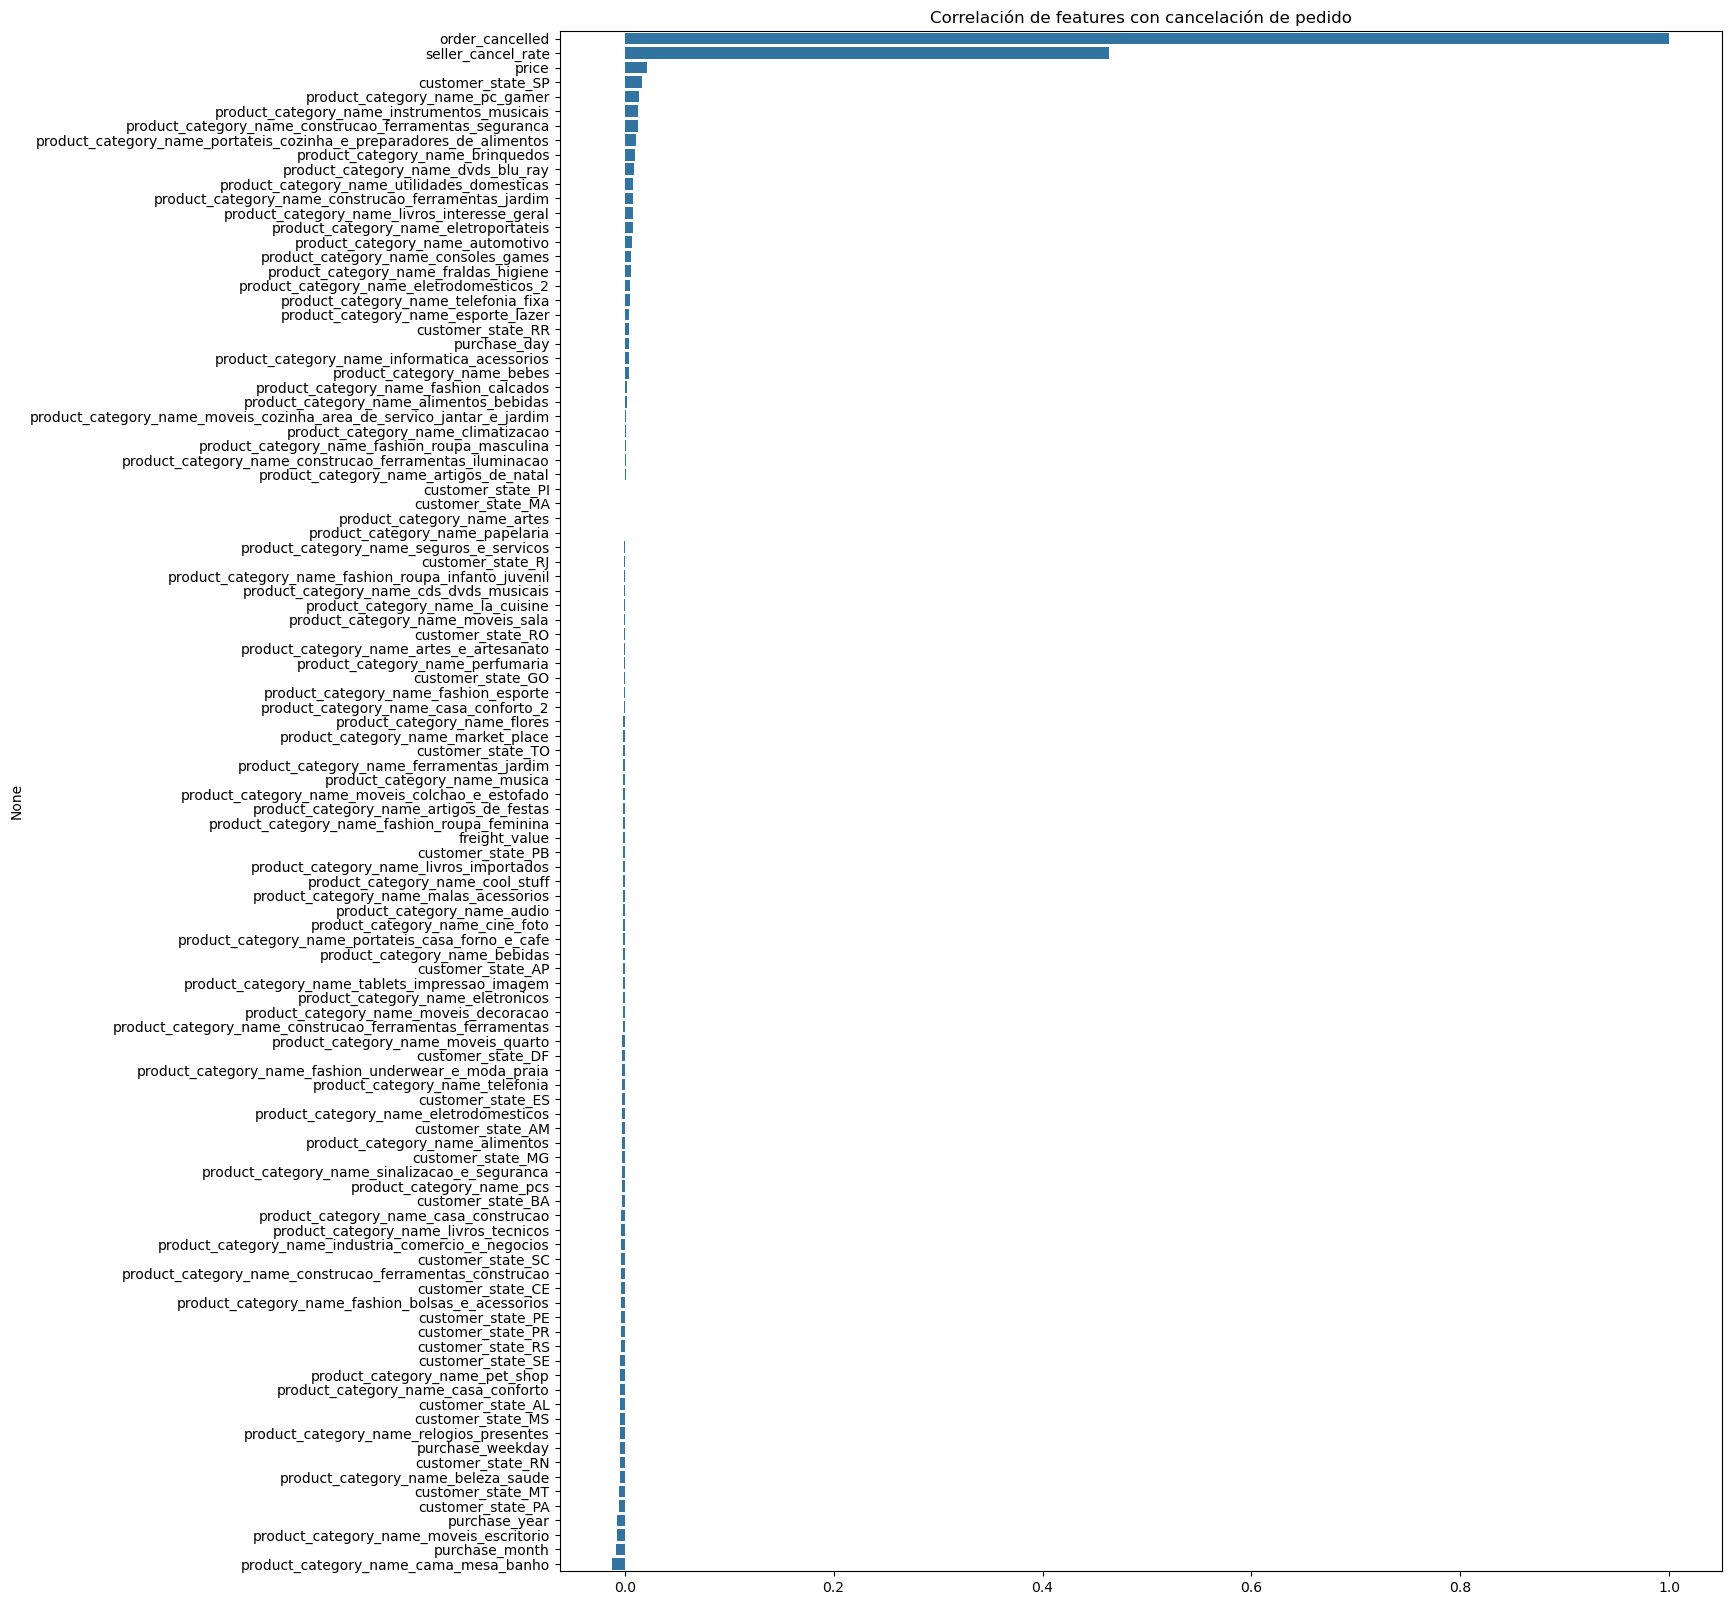

In [155]:
plt.figure(figsize=(15,20))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title("Correlación de features con cancelación de pedido")
plt.show()

In [157]:
ordenes.groupby('order_status')['order_id'].count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

In [159]:
# Vemos que existe un desbalance enorme entre las categorias 'delivered' y 'canceled', lo cual es un problema importante para la realizacion del modelo.

# Vamos a intetnar utilizar algunas tecnincas para poder balancear estas categorias y poder realizar el modelo.


## Empezamos a realizar el mdeolo con Lightgbm.

#### 1) Utilizaremos la funcionalidad llamada "scale_pos_weight" que le va a dar mayor importancia a la clase minoritaria para balancear los datos.

In [162]:
!pip install lightgbm

In [300]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, average_precision_score, recall_score
import matplotlib.pyplot as plt

In [164]:
print(data.columns.tolist())

['price', 'freight_value', 'seller_id', 'order_status', 'order_purchase_timestamp', 'purchase_year', 'purchase_month', 'purchase_day', 'purchase_weekday', 'order_cancelled', 'seller_cancel_rate', 'customer_state_AL', 'customer_state_AM', 'customer_state_AP', 'customer_state_BA', 'customer_state_CE', 'customer_state_DF', 'customer_state_ES', 'customer_state_GO', 'customer_state_MA', 'customer_state_MG', 'customer_state_MS', 'customer_state_MT', 'customer_state_PA', 'customer_state_PB', 'customer_state_PE', 'customer_state_PI', 'customer_state_PR', 'customer_state_RJ', 'customer_state_RN', 'customer_state_RO', 'customer_state_RR', 'customer_state_RS', 'customer_state_SC', 'customer_state_SE', 'customer_state_SP', 'customer_state_TO', 'product_category_name_alimentos', 'product_category_name_alimentos_bebidas', 'product_category_name_artes', 'product_category_name_artes_e_artesanato', 'product_category_name_artigos_de_festas', 'product_category_name_artigos_de_natal', 'product_category_na

In [302]:
X = data.drop(columns=['order_status','order_purchase_timestamp','order_cancelled','seller_id'])
y = data['order_cancelled']

In [304]:
num_neg = (y == 0).sum()  # delivered
num_pos = (y == 1).sum()  # canceled
scale_pos_weight = num_neg / num_pos
print(f"Scale_pos_weight: {scale_pos_weight:.2f}")

Scale_pos_weight: 206.84


In [306]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_scores = []
f1_scores = []
pr_auc_scores = []
best_thresholds = []
recall_scores = []

In [308]:
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'verbosity': -1
    }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)])
    
    y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    
    thresholds = np.arange(0.001, 0.5, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    recall_scores.append(recall_score(y_val, y_pred_best))

print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Exhaustividad (Recall) promedio: {np.mean(recall_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.940217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.948233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	valid_0's auc: 0.966692
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.931438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.958492
ROC-AUC promedio: 0.9490
F1-score promedio: 0.1741
PR-AUC promedio: 0.2581
Mejor umbral promedio: 0.4984
Exhaustividad (Recall) promedio: 0.6274
Mejor umbral promedio: 0.4984


In [176]:
# El modelo puede discriminar muy bien entre la categorias "delivered" y "canceled".

# Tiene un F1 score muy bajo ya que predice muy pocos "canceled" pero se debe al gran desbalance que hay entre las categorias.

In [310]:
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'verbosity': -1
    }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)])
    
    y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    
    thresholds = np.arange(0.001, 0.3, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    recall_scores.append(recall_score(y_val, y_pred_best))

print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Exhaustividad (Recall) promedio: {np.mean(recall_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.940217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.948233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	valid_0's auc: 0.966692
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.931438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.958492
ROC-AUC promedio: 0.9490
F1-score promedio: 0.1494
PR-AUC promedio: 0.2581
Mejor umbral promedio: 0.3968
Exhaustividad (Recall) promedio: 0.6597
Mejor umbral promedio: 0.3968


In [184]:
# Vemos que aunque disminuimos el threshold el score no mejora.

# Vamos a intentar aumentando el threshold.


In [312]:
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'verbosity': -1
    }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)])
    
    y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    
    thresholds = np.arange(0.001, 0.6, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    recall_scores.append(recall_score(y_val, y_pred_best))

print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Exhaustividad (Recall) promedio: {np.mean(recall_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.940217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.948233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	valid_0's auc: 0.966692
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.931438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.958492
ROC-AUC promedio: 0.9490
F1-score promedio: 0.1688
PR-AUC promedio: 0.2581
Mejor umbral promedio: 0.4622
Exhaustividad (Recall) promedio: 0.6428
Mejor umbral promedio: 0.4622


In [314]:
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'verbosity': -1
    }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)])
    
    y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    
    thresholds = np.arange(0.001, 0.7, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    recall_scores.append(recall_score(y_val, y_pred_best))

print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Exhaustividad (Recall) promedio: {np.mean(recall_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.940217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.948233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	valid_0's auc: 0.966692
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.931438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.958492
ROC-AUC promedio: 0.9490
F1-score promedio: 0.1865
PR-AUC promedio: 0.2581
Mejor umbral promedio: 0.5205
Exhaustividad (Recall) promedio: 0.6223
Mejor umbral promedio: 0.5205


In [316]:
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'verbosity': -1
    }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)])
    
    y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    
    thresholds = np.arange(0.001, 0.8, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    recall_scores.append(recall_score(y_val, y_pred_best))

print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Exhaustividad (Recall) promedio: {np.mean(recall_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.940217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.948233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	valid_0's auc: 0.966692
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.931438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.958492
ROC-AUC promedio: 0.9490
F1-score promedio: 0.2075
PR-AUC promedio: 0.2581
Mejor umbral promedio: 0.5756
Exhaustividad (Recall) promedio: 0.6016
Mejor umbral promedio: 0.5756


In [318]:
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'verbosity': -1
    }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)])
    
    y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    
    thresholds = np.arange(0.001, 0.9, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    recall_scores.append(recall_score(y_val, y_pred_best))

print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Exhaustividad (Recall) promedio: {np.mean(recall_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.940217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.948233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	valid_0's auc: 0.966692
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.931438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.958492
ROC-AUC promedio: 0.9490
F1-score promedio: 0.2317
PR-AUC promedio: 0.2581
Mejor umbral promedio: 0.6278
Exhaustividad (Recall) promedio: 0.5773
Mejor umbral promedio: 0.6278


In [320]:
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'verbosity': -1
    }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)])
    
    y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    
    thresholds = np.arange(0.001, 0.95, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    recall_scores.append(recall_score(y_val, y_pred_best))

print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Exhaustividad (Recall) promedio: {np.mean(recall_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.940217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.948233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	valid_0's auc: 0.966692
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.931438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.958492
ROC-AUC promedio: 0.9490
F1-score promedio: 0.2553
PR-AUC promedio: 0.2581
Mejor umbral promedio: 0.6728
Exhaustividad (Recall) promedio: 0.5513
Mejor umbral promedio: 0.6728


In [322]:
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'verbosity': -1
    }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)])
    
    y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    
    thresholds = np.arange(0.001, 0.98, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    recall_scores.append(recall_score(y_val, y_pred_best))

print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Exhaustividad (Recall) promedio: {np.mean(recall_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.940217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.948233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	valid_0's auc: 0.966692
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.931438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.958492
ROC-AUC promedio: 0.9490
F1-score promedio: 0.2756
PR-AUC promedio: 0.2581
Mejor umbral promedio: 0.7091
Exhaustividad (Recall) promedio: 0.5285
Mejor umbral promedio: 0.7091


In [330]:
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'scale_pos_weight': scale_pos_weight,
        'seed': 42,
        'verbosity': -1
    }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)])
    
    y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    
    thresholds = np.arange(0.001, 0.99, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    recall_scores.append(recall_score(y_val, y_pred_best))

print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Exhaustividad (Recall) promedio: {np.mean(recall_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.940217
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.948233
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[122]	valid_0's auc: 0.966692
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.931438
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.958492
ROC-AUC promedio: 0.9490
F1-score promedio: 0.3041
PR-AUC promedio: 0.2581
Mejor umbral promedio: 0.7599
Exhaustividad (Recall) promedio: 0.4966
Mejor umbral promedio: 0.7599


In [352]:
# MODELO FINAL

best_iterations = 100 


final_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'scale_pos_weight': scale_pos_weight,
    'seed': 42,
    'verbosity': -1
}

lgb_data_final = lgb.Dataset(X, label=y)

final_model = lgb.train(
    final_params,
    lgb_data_final,
    num_boost_round=best_iterations
)

print("El modelo final ha sido entrenado y guardado en la variable 'final_model'.")

El modelo final ha sido entrenado y guardado en la variable 'final_model'.


In [356]:
best_thresh =  0.7599 

y_pred_prob = final_model.predict(X)

y_pred_final = (y_pred_prob >= best_thresh).astype(int)


precision = precision_score(y, y_pred_final)
recall = recall_score(y, y_pred_final)
f1 = f1_score(y, y_pred_final)
pr_auc = average_precision_score(y, y_pred_prob)
roc_auc = roc_auc_score(y, y_pred_prob)

print("--- Métricas del Modelo Final con Umbral Óptimo ---")
print(f"Mejor umbral usado: {best_thresh:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1 (F1-score): {f1:.4f}")
print(f"Área bajo la curva Precisión-Exhaustividad (PR-AUC): {pr_auc:.4f}")
print(f"Área bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")

--- Métricas del Modelo Final con Umbral Óptimo ---
Mejor umbral usado: 0.7599
Precisión: 0.2034
Exhaustividad (Recall): 0.9594
Puntuación F1 (F1-score): 0.3356
Área bajo la curva Precisión-Exhaustividad (PR-AUC): 0.4818
Área bajo la curva ROC (ROC-AUC): 0.9955


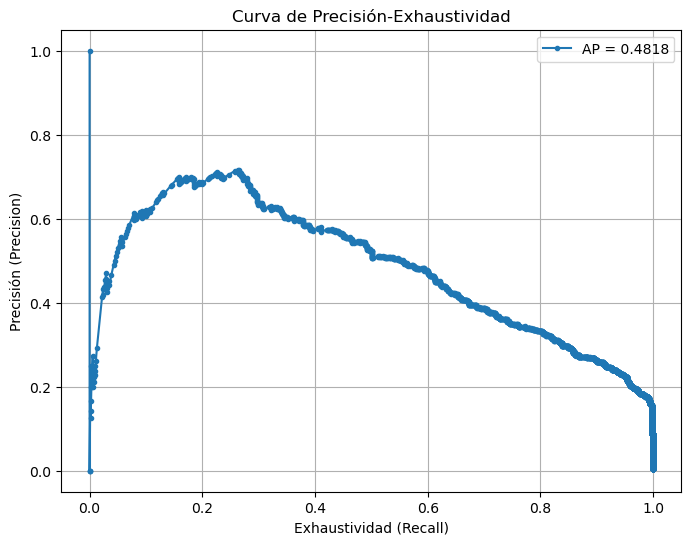

Área bajo la curva Precisión-Exhaustividad (PR-AUC): 0.4818


In [362]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_prob = final_model.predict(X)
precision, recall, _ = precision_recall_curve(y, y_pred_prob)
ap_score = average_precision_score(y, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AP = {ap_score:.4f}')
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión (Precision)')
plt.title('Curva de Precisión-Exhaustividad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Área bajo la curva Precisión-Exhaustividad (PR-AUC): {ap_score:.4f}")

## 2) Utilizaremos las tecnicas de "oversamplings" y "subsamplings" para balancear los datos.

In [261]:
!pip install imbalanced-learn

In [366]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

In [368]:
X = data.drop(columns=['order_status','order_purchase_timestamp','order_cancelled','seller_id'])
y = data['order_cancelled']

In [370]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [372]:
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train, y_train)

print(f"Shape original: {X_train.shape}, canceladas: {y_train.sum()}")
print(f"Shape balanceado: {X_res.shape}, canceladas: {y_res.sum()}")

Shape original: (90120, 105), canceladas: 434
Shape balanceado: (173057, 105), canceladas: 89492


In [373]:
lgb_train = lgb.Dataset(X_res, label=y_res)
lgb_val = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42,
    'verbosity': -1
}

model_2 = lgb.train(params, lgb_train, valid_sets=[lgb_val],
                  num_boost_round=1000,
                  callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)]
                 )

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.958445


In [392]:
y_pred_proba = model_2.predict(X_test, num_iteration=model_2.best_iteration)

thresholds = np.arange(0.001, 0.5, 0.001)
best_thresh = 0.001
best_f1 = 0

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

y_pred_final = (y_pred_proba >= best_thresh).astype(int)

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print("--- Evaluación del Modelo en Conjunto de Prueba ---")
print(f"Mejor umbral: {best_thresh:.4f}")
print(f"Puntuación F1 (F1-score) óptima: {best_f1:.4f}")
print(f"Precisión con el mejor umbral: {precision:.4f}")
print(f"Exhaustividad (Recall) con el mejor umbral: {recall:.4f}")
print(f"Área bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")
print(f"Área bajo la curva Precisión-Exhaustividad (PR-AUC): {pr_auc:.4f}")

--- Evaluación del Modelo en Conjunto de Prueba ---
Mejor umbral: 0.4990
Puntuación F1 (F1-score) óptima: 0.1521
Precisión con el mejor umbral: 0.0857
Exhaustividad (Recall) con el mejor umbral: 0.6759
Área bajo la curva ROC (ROC-AUC): 0.9584
Área bajo la curva Precisión-Exhaustividad (PR-AUC): 0.2505


In [394]:
y_pred_proba = model_2.predict(X_test, num_iteration=model_2.best_iteration)

thresholds = np.arange(0.001, 0.7, 0.001)
best_thresh = 0.001
best_f1 = 0

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

y_pred_final = (y_pred_proba >= best_thresh).astype(int)

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print("--- Evaluación del Modelo en Conjunto de Prueba ---")
print(f"Mejor umbral: {best_thresh:.4f}")
print(f"Puntuación F1 (F1-score) óptima: {best_f1:.4f}")
print(f"Precisión con el mejor umbral: {precision:.4f}")
print(f"Exhaustividad (Recall) con el mejor umbral: {recall:.4f}")
print(f"Área bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")
print(f"Área bajo la curva Precisión-Exhaustividad (PR-AUC): {pr_auc:.4f}")

--- Evaluación del Modelo en Conjunto de Prueba ---
Mejor umbral: 0.6990
Puntuación F1 (F1-score) óptima: 0.1949
Precisión con el mejor umbral: 0.1178
Exhaustividad (Recall) con el mejor umbral: 0.5648
Área bajo la curva ROC (ROC-AUC): 0.9584
Área bajo la curva Precisión-Exhaustividad (PR-AUC): 0.2505


In [396]:
y_pred_proba = model_2.predict(X_test, num_iteration=model_2.best_iteration)

thresholds = np.arange(0.001, 0.8, 0.001)
best_thresh = 0.001
best_f1 = 0

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

y_pred_final = (y_pred_proba >= best_thresh).astype(int)

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print("--- Evaluación del Modelo en Conjunto de Prueba ---")
print(f"Mejor umbral: {best_thresh:.4f}")
print(f"Puntuación F1 (F1-score) óptima: {best_f1:.4f}")
print(f"Precisión con el mejor umbral: {precision:.4f}")
print(f"Exhaustividad (Recall) con el mejor umbral: {recall:.4f}")
print(f"Área bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")
print(f"Área bajo la curva Precisión-Exhaustividad (PR-AUC): {pr_auc:.4f}")

--- Evaluación del Modelo en Conjunto de Prueba ---
Mejor umbral: 0.7990
Puntuación F1 (F1-score) óptima: 0.2494
Precisión con el mejor umbral: 0.1652
Exhaustividad (Recall) con el mejor umbral: 0.5093
Área bajo la curva ROC (ROC-AUC): 0.9584
Área bajo la curva Precisión-Exhaustividad (PR-AUC): 0.2505


In [398]:
y_pred_proba = model_2.predict(X_test, num_iteration=model_2.best_iteration)

thresholds = np.arange(0.001, 0.9, 0.001)
best_thresh = 0.001
best_f1 = 0

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

y_pred_final = (y_pred_proba >= best_thresh).astype(int)

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print("--- Evaluación del Modelo en Conjunto de Prueba ---")
print(f"Mejor umbral: {best_thresh:.4f}")
print(f"Puntuación F1 (F1-score) óptima: {best_f1:.4f}")
print(f"Precisión con el mejor umbral: {precision:.4f}")
print(f"Exhaustividad (Recall) con el mejor umbral: {recall:.4f}")
print(f"Área bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")
print(f"Área bajo la curva Precisión-Exhaustividad (PR-AUC): {pr_auc:.4f}")

--- Evaluación del Modelo en Conjunto de Prueba ---
Mejor umbral: 0.8990
Puntuación F1 (F1-score) óptima: 0.3431
Precisión con el mejor umbral: 0.2831
Exhaustividad (Recall) con el mejor umbral: 0.4352
Área bajo la curva ROC (ROC-AUC): 0.9584
Área bajo la curva Precisión-Exhaustividad (PR-AUC): 0.2505


In [400]:
y_pred_proba = model_2.predict(X_test, num_iteration=model_2.best_iteration)

thresholds = np.arange(0.001, 0.95, 0.001)
best_thresh = 0.001
best_f1 = 0

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

y_pred_final = (y_pred_proba >= best_thresh).astype(int)

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print("--- Evaluación del Modelo en Conjunto de Prueba ---")
print(f"Mejor umbral: {best_thresh:.4f}")
print(f"Puntuación F1 (F1-score) óptima: {best_f1:.4f}")
print(f"Precisión con el mejor umbral: {precision:.4f}")
print(f"Exhaustividad (Recall) con el mejor umbral: {recall:.4f}")
print(f"Área bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")
print(f"Área bajo la curva Precisión-Exhaustividad (PR-AUC): {pr_auc:.4f}")

--- Evaluación del Modelo en Conjunto de Prueba ---
Mejor umbral: 0.9480
Puntuación F1 (F1-score) óptima: 0.3800
Precisión con el mejor umbral: 0.4130
Exhaustividad (Recall) con el mejor umbral: 0.3519
Área bajo la curva ROC (ROC-AUC): 0.9584
Área bajo la curva Precisión-Exhaustividad (PR-AUC): 0.2505


In [402]:
y_pred_proba = model_2.predict(X_test, num_iteration=model_2.best_iteration)

thresholds = np.arange(0.001, 0.98, 0.001)
best_thresh = 0.001
best_f1 = 0

for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)
    if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

y_pred_final = (y_pred_proba >= best_thresh).astype(int)

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print("--- Evaluación del Modelo en Conjunto de Prueba ---")
print(f"Mejor umbral: {best_thresh:.4f}")
print(f"Puntuación F1 (F1-score) óptima: {best_f1:.4f}")
print(f"Precisión con el mejor umbral: {precision:.4f}")
print(f"Exhaustividad (Recall) con el mejor umbral: {recall:.4f}")
print(f"Área bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")
print(f"Área bajo la curva Precisión-Exhaustividad (PR-AUC): {pr_auc:.4f}")

--- Evaluación del Modelo en Conjunto de Prueba ---
Mejor umbral: 0.9480
Puntuación F1 (F1-score) óptima: 0.3800
Precisión con el mejor umbral: 0.4130
Exhaustividad (Recall) con el mejor umbral: 0.3519
Área bajo la curva ROC (ROC-AUC): 0.9584
Área bajo la curva Precisión-Exhaustividad (PR-AUC): 0.2505


## Conclusión

#### Aunque el segundo modelo tiene un F1-score más alto, la diferencia es pequeña y la exhaustividad del segundo modelo es dramáticamente inferior.

#### En este caso, el costo de un falso negativo (un cliente que cancela y que el modelo no identificó) es muy alto, ya que se pierde la venta. El costo de un falso positivo (un cliente contactado que no iba a cancelar) es relativamente bajo. Por lo tanto, el primer modelo, con una exhaustividad de casi el 96%, es el ganador claro para el objetivo de negocio.

#### Es mejor utilizar la opción 1 (scale_pos_weight) para realizar el balanceo de los datos. Ademas evitamos la creacion de datos sintenticos, simplemente le dice al modelo que dé más importancia a los ejemplos de la clase minoritaria. Esto permite que el modelo aprenda directamente de los datos originales.

In [254]:
X = data.drop(columns=['order_status','order_purchase_timestamp','order_cancelled','seller_id'])
y = data['order_cancelled']

In [256]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_scores = []
f1_scores = []
pr_auc_scores = []

In [442]:
final_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'scale_pos_weight': scale_pos_weight,
    'seed': 42,
    'verbosity': -1
}

lgb_data_final = lgb.Dataset(X, label=y)

final_model = lgb.train(
    final_params,
    lgb_data_final,
    num_boost_round=best_iterations
)

In [443]:
best_thresh =  0.7599 

y_pred_prob = final_model.predict(X)

y_pred_final = (y_pred_prob >= best_thresh).astype(int)


precision = precision_score(y, y_pred_final)
recall = recall_score(y, y_pred_final)
f1 = f1_score(y, y_pred_final)
pr_auc = average_precision_score(y, y_pred_prob)
roc_auc = roc_auc_score(y, y_pred_prob)

print("--- Métricas del Modelo Final con Umbral Óptimo ---")
print(f"Mejor umbral usado: {best_thresh:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1 (F1-score): {f1:.4f}")
print(f"Área bajo la curva Precisión-Exhaustividad (PR-AUC): {pr_auc:.4f}")
print(f"Área bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")

--- Métricas del Modelo Final con Umbral Óptimo ---
Mejor umbral usado: 0.7599
Precisión: 0.2034
Exhaustividad (Recall): 0.9594
Puntuación F1 (F1-score): 0.3356
Área bajo la curva Precisión-Exhaustividad (PR-AUC): 0.4818
Área bajo la curva ROC (ROC-AUC): 0.9955


### F1-score: 0.3356 → bajo, indica que aunque el recall es alto, la precisión es muy mala.

### Precisión: 0.2034 → solo 20% de las predicciones positivas son correctas, muy bajo.

### Recall: 0.9594 → alto, detecta casi todos los positivos, pero a costa de muchos falsos positivos.

### ROC-AUC: 0.9955 → Muy bueno.

### PR-AUC: 0.4818 → Bastante bajo, confirma el problema de desbalance y precisión pobre.


## Vamos a probar otro tipo de modelo: XGBoost

In [462]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, precision_score, recall_score
from collections import Counter

In [468]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [470]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_scores = []
f1_scores = []
pr_auc_scores = []
best_thresholds = []
precision_scores = []
recall_scores = []

In [486]:
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [496]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "scale_pos_weight": scale_pos_weight,  
    "learning_rate": 0.03,
    "max_depth": 5,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

num_boost_round = 1000
early_stopping_rounds = 50


for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    evals = [(dval, "eval")]
    
    
    bst = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=evals,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False
    )
    
   
    y_pred_prob = bst.predict(dval, iteration_range=(0, bst.best_iteration))
    
    
    thresholds = np.arange(0.001, 0.98, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
   
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    precision_scores.append(precision_score(y_val, y_pred_best))
    recall_scores.append(recall_score(y_val, y_pred_best))

# Resultados promedio
print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Precisión promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}")

ROC-AUC promedio: 0.9596
F1-score promedio: 0.3888
PR-AUC promedio: 0.3276
Mejor umbral promedio: 0.8696
Precisión promedio: 0.4311
Recall promedio: 0.3784


In [498]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "scale_pos_weight": scale_pos_weight,  # tu valor calculado
    "learning_rate": 0.03,
    "max_depth": 5,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}


dtrain_full = xgb.DMatrix(X, label=y)


bst_final = xgb.train(
    params,
    dtrain_full,
    num_boost_round=1000,
    evals=[(dtrain_full, "train")],
    verbose_eval=True
)


best_threshold_final = 0.8696

[0]	train-auc:0.66248
[1]	train-auc:0.95719
[2]	train-auc:0.95182
[3]	train-auc:0.96815
[4]	train-auc:0.96473
[5]	train-auc:0.96982
[6]	train-auc:0.97163
[7]	train-auc:0.97176
[8]	train-auc:0.97297
[9]	train-auc:0.97316
[10]	train-auc:0.97378
[11]	train-auc:0.97409
[12]	train-auc:0.97414
[13]	train-auc:0.97407
[14]	train-auc:0.97428
[15]	train-auc:0.97420
[16]	train-auc:0.97408
[17]	train-auc:0.97450
[18]	train-auc:0.97458
[19]	train-auc:0.97466
[20]	train-auc:0.97457
[21]	train-auc:0.97457
[22]	train-auc:0.97465
[23]	train-auc:0.97457
[24]	train-auc:0.97486
[25]	train-auc:0.97468
[26]	train-auc:0.97502
[27]	train-auc:0.97501
[28]	train-auc:0.97538
[29]	train-auc:0.97528
[30]	train-auc:0.97524
[31]	train-auc:0.97527
[32]	train-auc:0.97555
[33]	train-auc:0.97594
[34]	train-auc:0.97605
[35]	train-auc:0.97599
[36]	train-auc:0.97602
[37]	train-auc:0.97604
[38]	train-auc:0.97616
[39]	train-auc:0.97607
[40]	train-auc:0.97610
[41]	train-auc:0.97615
[42]	train-auc:0.97624
[43]	train-auc:0.9763

In [502]:
# Predicciones probabilísticas en todo el dataset
y_pred_prob_full = bst_final.predict(dtrain_full)

# Aplicar el mejor umbral
y_pred_final = (y_pred_prob_full >= best_threshold_final).astype(int)

# Métricas finales
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score

print(f"F1-score: {f1_score(y, y_pred_final):.4f}")
print(f"Precision: {precision_score(y, y_pred_final):.4f}")
print(f"Recall: {recall_score(y, y_pred_final):.4f}")
print(f"ROC-AUC: {roc_auc_score(y, y_pred_prob_full):.4f}")
print(f"PR-AUC: {average_precision_score(y, y_pred_prob_full):.4f}")


F1-score: 0.6908
Precision: 0.5489
Recall: 0.9317
ROC-AUC: 0.9989
PR-AUC: 0.8199


### F1-score: 0.6908 → Muy bueno, indica un buen balance entre precisión y recall.

### Precisión: 0.5489 → 54.9% de las predicciones positivas son correctas. Mucho mejor que el resultado con LightGBM.

### Recall: 0.9317 → Detecta el 93% de los positivos reales. Altísimo, casi como el resultado de LightGBM (apenas por debajo).

### ROC-AUC: 0.9989 → Excelente discriminación entre clases.

### PR-AUC: 0.8199 → Mucho más alta que antes, indica que el modelo funciona mucho mejor con la clase minoritaria.

# 3️⃣ Interpretación y comparación

## El modelo creado con XGBoost es superior en este caso:

#### - Mantiene un recall alto (~93%), casi igual que LightGBM.

#### - La precisión aumento a ~55%, mucho mejor que los ~20% de LightGBM.

#### - Tiene un F1-score mucho más alto (0.69 vs 0.33), lo que significa mejor balance entre detectar positivos y no predecir falsos positivos.

#### - PR-AUC mucho mayor, indica que el modelo maneja la clase minoritaria mucho mejor que el creado con LightGBM.

## En cuanto al Umbral óptimo:

#### - LightGBM usaba ~0.76 → priorizaba recall extremo y sacrificaba precisión.

#### - XGBoost usó ~0.87 → mantiene un buen recall, pero mejora significativamente la precisión.

## ROC-AUC:

#### - Aunque ambos modelos tienen ROC-AUC excelente (>0.99), la métrica de PR-AUC es la más importante cuando existen clases desbalanceadas. Aquí XGBoost gana ampliamente (0.82 vs 0.48).

# ✅ Conclusión

## El modelo XGBoost final es mucho mejor que LightGBM en este dataset desbalanceado. Esto se debe a que se logra un alto recall y mucho mejor precisión, con un F1-score sólido.

# Vamos a probar XGBoost con SMOTE para el balanceo.

In [521]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [511]:
from imblearn.over_sampling import SMOTE

In [513]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_scores = []
f1_scores = []
pr_auc_scores = []
best_thresholds = []
precision_scores = []
recall_scores = []

In [515]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.03,
    "max_depth": 5,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

num_boost_round = 1000
early_stopping_rounds = 50

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Aplicar SMOTE al conjunto de entrenamiento
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    # Convertir a DMatrix
    dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
    dval = xgb.DMatrix(X_val, label=y_val)
    evals = [(dval, "eval")]
    
    # Entrenamiento con early stopping
    bst = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=evals,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False
    )
    
    # Predicciones probabilísticas
    y_pred_prob = bst.predict(dval, iteration_range=(0, bst.best_iteration))
    
    # Buscar el mejor umbral para F1-score
    thresholds = np.arange(0.001, 0.98, 0.001)
    best_f1_iter = 0
    best_thresh_iter = 0
    
    for t in thresholds:
        y_pred = (y_pred_prob >= t).astype(int)
        if np.sum(y_pred) > 0 and np.sum(y_pred) < len(y_pred):
            f1 = f1_score(y_val, y_pred)
            if f1 > best_f1_iter:
                best_f1_iter = f1
                best_thresh_iter = t
    
    # Métricas con el mejor umbral
    y_pred_best = (y_pred_prob >= best_thresh_iter).astype(int)
    
    roc_scores.append(roc_auc_score(y_val, y_pred_prob))
    f1_scores.append(best_f1_iter)
    pr_auc_scores.append(average_precision_score(y_val, y_pred_prob))
    best_thresholds.append(best_thresh_iter)
    precision_scores.append(precision_score(y_val, y_pred_best))
    recall_scores.append(recall_score(y_val, y_pred_best))

# Resultados promedio
print(f"ROC-AUC promedio: {np.mean(roc_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")
print(f"PR-AUC promedio: {np.mean(pr_auc_scores):.4f}")
print(f"Mejor umbral promedio: {np.mean(best_thresholds):.4f}")
print(f"Precisión promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}")

ROC-AUC promedio: 0.9548
F1-score promedio: 0.3482
PR-AUC promedio: 0.2634
Mejor umbral promedio: 0.9048
Precisión promedio: 0.3338
Recall promedio: 0.4041


## SMOTE no mejoró las métricas del modelo.